In [1]:
from vnpy.trader.constant import Exchange,Interval
from data_analysis import DataAnalysis
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
herramiento = DataAnalysis()
herramiento.load_history(    
    symbol="XBTUSD", 
    exchange=Exchange.BITMEX, 
    interval=Interval.HOUR, 
    start=datetime(2019, 9, 1), 
    end=datetime(2019, 10, 30),
    rate = 8/10000,
    index_3to1 = ["ATR","CCI"],
    index_1to1 = ["STDDEV","SMA","KAMA","DEMA"],
    index_2to2 = ["AROON"],
    index_2to1 = ["AROONOSC"],
    index_4to1 = ["BOP"],
    window_index=30,
)

2021-04-13 20:03:54.393141	开始加载历史数据
2021-04-13 20:03:54.476675	历史数据加载完成，数据量：1417


2021-04-13 20:03:58.207063	第一步:画出行情图，检查数据断点


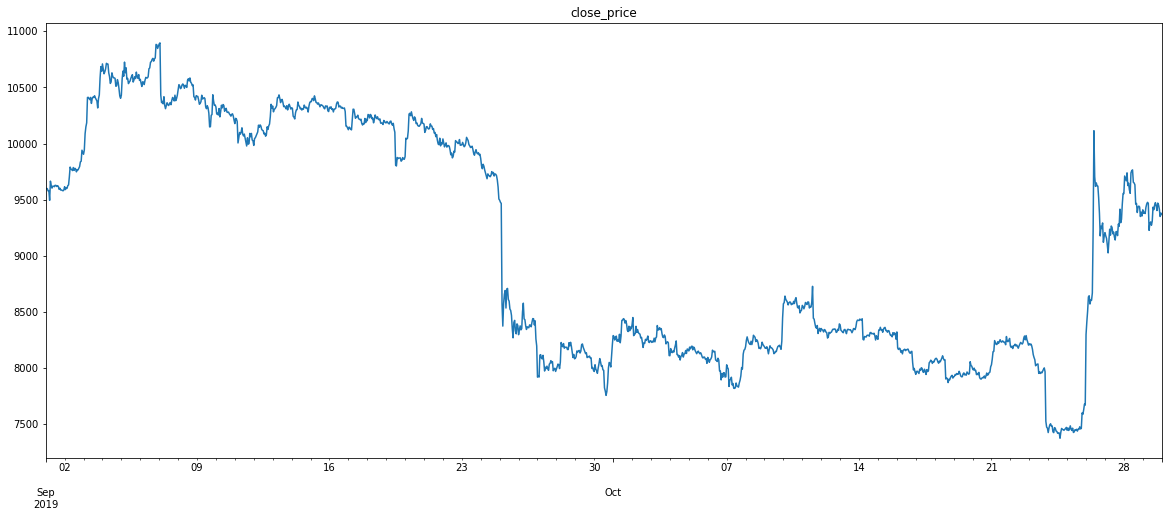

2021-04-13 20:03:58.490673	第二步：随机性检验：非纯随机性
2021-04-13 20:03:58.490673	白噪声检验结果:(array([1414.02461245]), array([1.88304957e-309]))

2021-04-13 20:03:58.527574	第三步：平稳性检验：存在单位根，时间序列不平稳
2021-04-13 20:03:58.527574	ADF检验结果：(-1.5080069319015341, 0.5295467711268822, 10, 1406, {'1%': -3.4350095156582197, '5%': -2.863597846112653, '10%': -2.5678655888095925}, 15559.434875318453)

2021-04-13 20:03:58.528571	第四步：画出自相关性图，观察自相关特性


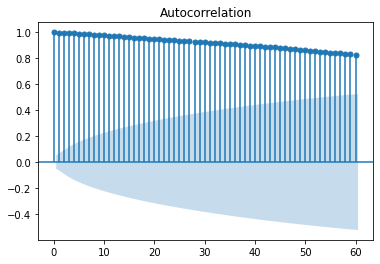

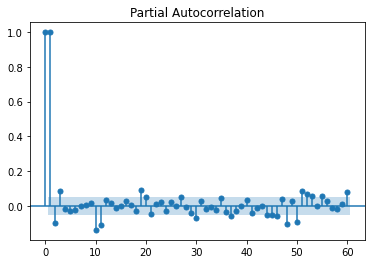

2021-04-13 20:03:58.760951	第五步：相对波动率分析


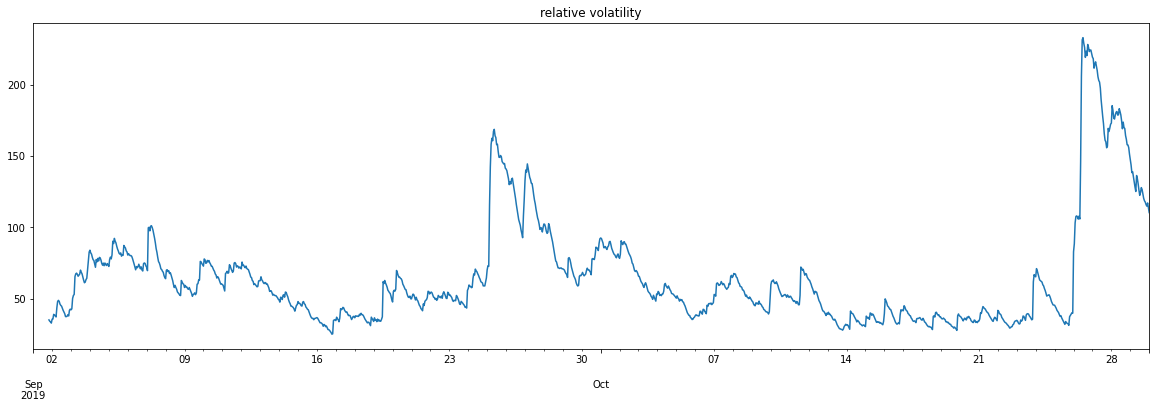

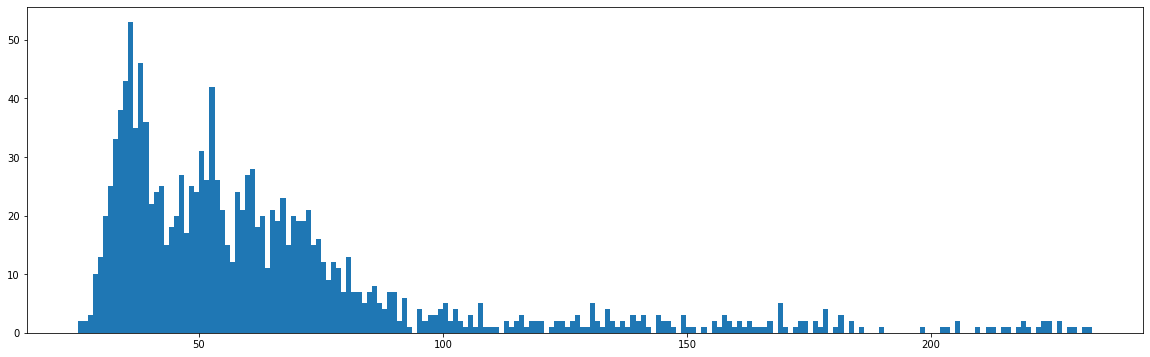

2021-04-13 20:03:59.294338	样本平均数：64.9984, 中位数: 54.1202
2021-04-13 20:03:59.294338	偏度为：2.145，属于分布偏左；峰度为：4.9615，属于分布陡峭

2021-04-13 20:03:59.294338	第六步：变化率分析


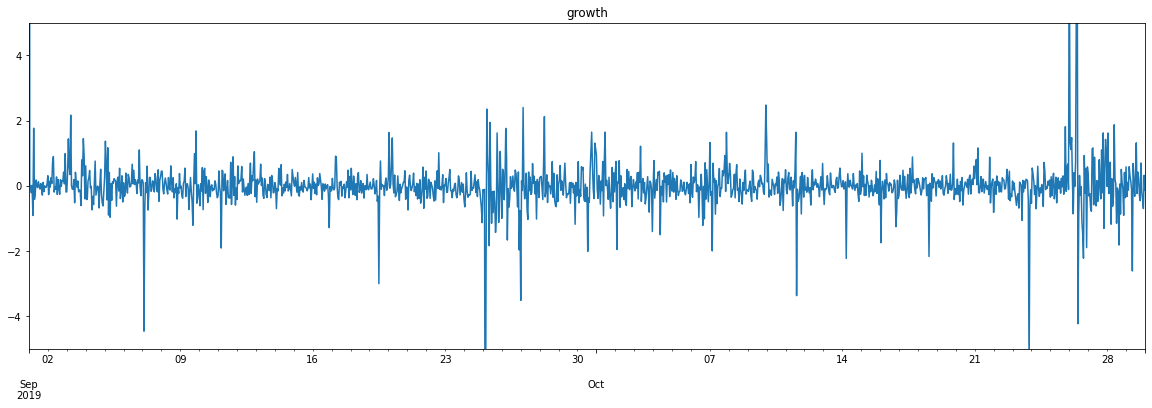

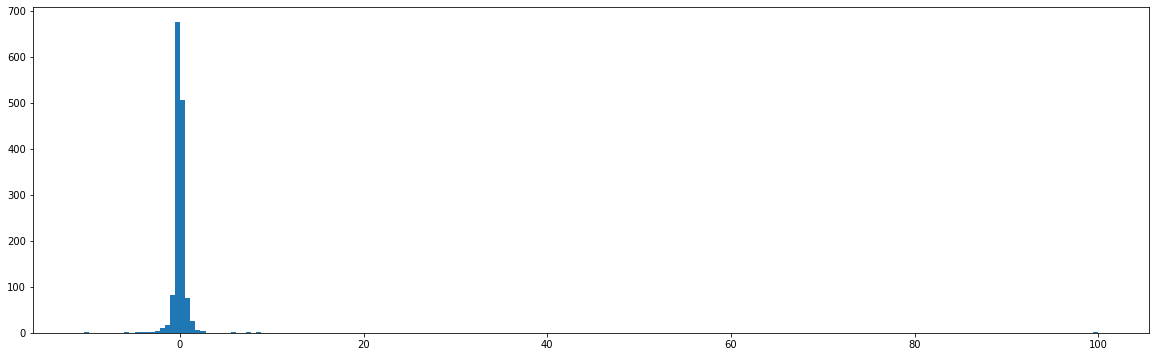

2021-04-13 20:03:59.871744	样本平均数：0.0663, 中位数: -0.0192
2021-04-13 20:03:59.871744	偏度为：33.8313，属于分布偏左；峰度为：1229.5733，属于分布陡峭

2021-04-13 20:03:59.871744	第七步：计算相关技术指标，返回DataFrame



In [3]:
data = herramiento.base_analysis()

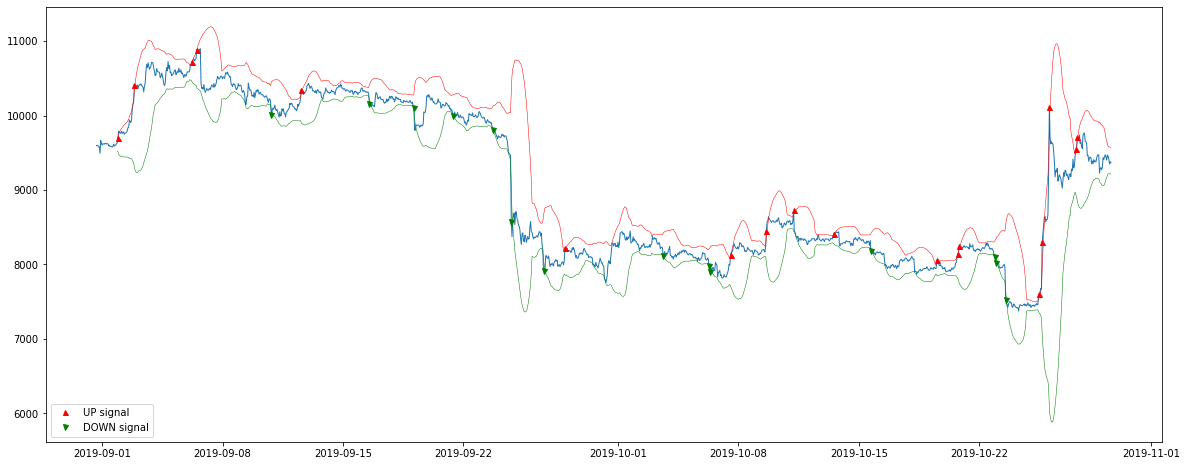

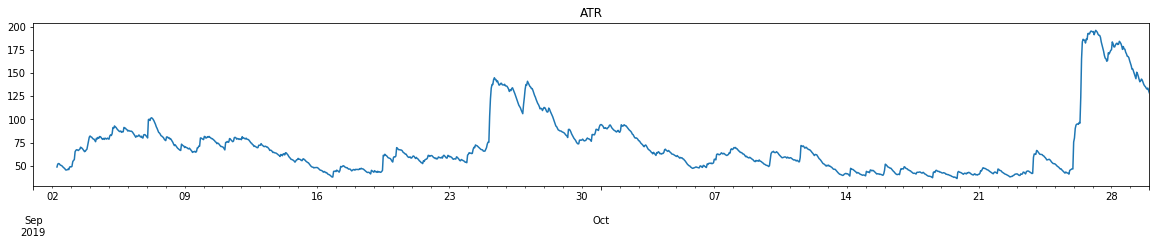

In [4]:
herramiento.show_chart(data[:1500], boll_wide=2.8)
  

In [ ]:
# 多时间周期分析
intervals = ["5min","15min","30min","1h","2h","4h"]
herramiento.multi_time_frame_analysis(intervals=intervals)

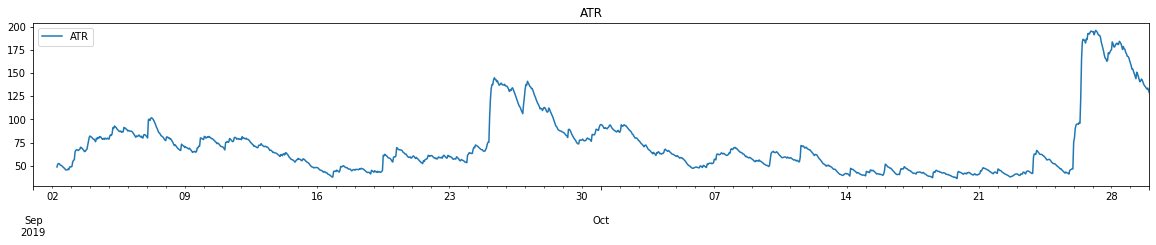

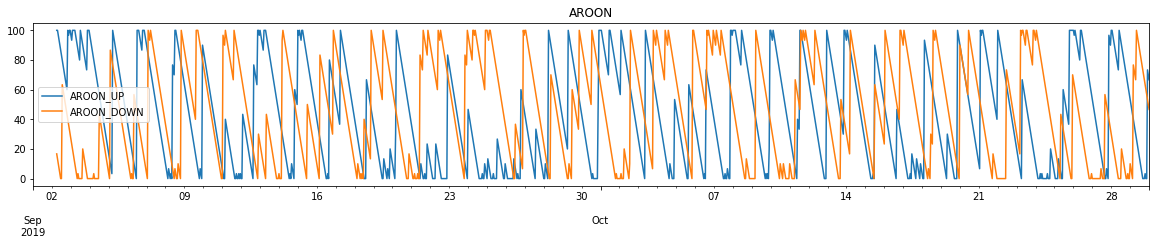

In [5]:

data["ATR"].plot(figsize=(20, 3), title="ATR")
plt.legend()
plt.show()
# plt.figure(figsize=(20, 3))
data["AROON_UP"].plot(figsize=(20, 3), title="AROON")
# plt.show()
data["AROON_DOWN"].plot(figsize=(20, 3), title="AROON")
plt.legend()
plt.show()

In [6]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [7]:
data.tail()

,open,high,low,close,volume,volatility,fixed_cost,relative_vol,pre_close,g%,STDDEV,SMA,KAMA,DEMA,ATR,CCI,AROON_UP,AROON_DOWN,AROONOSC,BOP
2019-10-29 20:00:00+08:00,9469.0,9480.5,9390.0,9452.5,105230494.0,123.562997,7.5620,116.000997,9469.0,-0.174557,65.593690,9401.033333,9432.213986,9435.408549,133.757307,55.735491,0.000000,60.000000,-60.000000,-0.182320
2019-10-29 21:00:00+08:00,9452.5,9486.0,9385.0,9414.5,149162799.0,122.434847,7.5316,114.903247,9452.5,-0.403633,64.717463,9399.500000,9432.083957,9433.945903,132.665396,42.505593,0.000000,56.666667,-56.666667,-0.376238
2019-10-29 22:00:00+08:00,9414.5,9438.0,9272.0,9349.5,245867658.0,124.613104,7.4796,117.133504,9414.5,-0.695224,64.103001,9395.616667,9430.976976,9424.468411,133.776550,-60.252871,73.333333,53.333333,20.000000,-0.391566
2019-10-29 23:00:00+08:00,9349.5,9382.0,9323.0,9380.0,75131393.0,121.332449,7.5040,113.828449,9349.5,0.325160,64.136878,9395.450000,9430.749501,9419.670863,131.283998,-46.262797,70.000000,50.000000,20.000000,0.516949
2019-10-30 00:00:00+08:00,9380.0,9380.5,9328.0,9367.5,71492215.0,117.890827,7.4940,110.396827,9380.0,-0.133440,63.936001,9393.266667,9430.175434,9413.746387,128.657865,-47.275859,66.666667,46.666667,20.000000,-0.238095


In [13]:

fig = go.Figure(data=go.Ohlc(x=data.index,
                open=data['open'],
                high=data['high'],
                low=data['low'],
                close=data['close'],
                name='Ohlc'))
fig.add_trace(go.Scatter(x=data.index,y=data['SMA'],name='SMA'))
fig.add_trace(go.Scatter(x=data.index,y=data['KAMA'],name='KAMA'))
fig.add_trace(go.Scatter(x=data.index,y=data['DEMA'],name='DEMA'))
# fig.add_trace(go.Scatter(x=data.index,y=data['SMA'],marker_color='blue', name='SMA'))
# fig.add_trace(go.Scatter(x=data.index,y=data['KAMA'],marker_color='pink', name='KAMA'))
# fig.add_trace(go.Scatter(x=data.index,y=data['DEMA'],marker_color='brown', name='DEMA'))
# fig.update(layout_xaxis_rangeslider_visible=False)
# fig.update_layout(height=400, width=700)
fig.show()